In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
dates_to_visualize = [
                                                                                            "2018-09", "2018-10", "2018-11", "2018-12",
    "2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12",
    "2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12",
    "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12",
    "2022-01", "2022-02", "2022-03", "2022-04", "2022-05", "2022-06", "2022-07", "2022-08", "2022-09", "2022-10", "2022-11", "2022-12",
    "2023-01", "2023-02", "2023-03", "2023-04", "2023-05", "2023-06", "2023-07", "2023-08", "2023-09", "2023-10", "2023-11", "2023-12",
    "2024-01", "2024-02", "2024-03", "2024-04", 
]

In [3]:
available_data_files = list(Path("../data/httparchive_metrics/nel_config").glob("*.parquet"))

used_data_files = list(filter(lambda file: file.stem.split("_")[-1] in dates_to_visualize, available_data_files))
used_data_files

[WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-08.parquet'),
 WindowsPath('../data

### Success fraction configuration over months


In [4]:
# Pick out the Failure Fraction files
ff_files = list(filter(lambda file: file.stem[:file.stem.rfind("_")] == 'success_fraction', used_data_files))
ff_files

[WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2018-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2018-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2018-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/success_fraction_2019-08.parquet'),
 WindowsPath('../data

### Aggregate results to visualize

In [5]:
from results.result_utils import concat_data_from_files

sf_data = concat_data_from_files(ff_files)
sf_data['nel_success_fraction'] = sf_data['nel_success_fraction'].astype('Float32')



sf_data

,date,nel_success_fraction,domain_count,domain_percent
0,2018-09,0.1,2,100.000000
0,2018-10,0.0,6,60.000000
1,2018-10,0.01,4,40.000000
0,2018-11,0.0,182,97.326203
1,2018-11,0.01,5,2.673797
...,...,...,...,...
12,2024-04,0.25,2,0.000077
13,2024-04,0.02,47,0.001802
14,2024-04,0.5,3,0.000115
15,2024-04,0.0099,1,0.000038


In [6]:
from results.result_utils import get_first_or_0, date_to_text_format

sf_result = pd.DataFrame({}, index=[
    '0.00',
    '0.00-0.01',
    '0.01',
    '0.01-0.05',
    '0.05',
    '0.05-0.10',
    '0.10',
    '0.10-0.25',
    '0.25',
    '0.25-0.50',
    '0.50',
    '0.50-1.00',
    '1.00',
])

for date in dates_to_visualize:
    month_sf_data = sf_data[sf_data['date'] == date]
    
    month_data_col = []
    
    # month_result['0.00']
    next_val = month_sf_data[month_sf_data['nel_success_fraction'] == 0].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.00-0.01'] 
    next_val = month_sf_data[(month_sf_data['nel_success_fraction'] > 0) & (month_sf_data['nel_success_fraction'] < 0.01)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.01']
    next_val = month_sf_data[month_sf_data['nel_success_fraction'] == 0.01].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.01-0.05']
    next_val = month_sf_data[(month_sf_data['nel_success_fraction'] > 0.01) & (month_sf_data['nel_success_fraction'] < 0.05)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.05'] 
    next_val = month_sf_data[month_sf_data['nel_success_fraction'] == 0.05].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.05-0.10'] 
    next_val = month_sf_data[(month_sf_data['nel_success_fraction'] > 0.05) & (month_sf_data['nel_success_fraction'] < 0.10)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.10']
    next_val = month_sf_data[month_sf_data['nel_success_fraction'] == 0.10].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.10-0.25']
    next_val = month_sf_data[(month_sf_data['nel_success_fraction'] > 0.10) & (month_sf_data['nel_success_fraction'] < 0.25)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.25']
    next_val = month_sf_data[month_sf_data['nel_success_fraction'] == 0.25].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.25-0.50']
    next_val = month_sf_data[(month_sf_data['nel_success_fraction'] > 0.25) & (month_sf_data['nel_success_fraction'] < 0.50)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.50']
    next_val = month_sf_data[month_sf_data['nel_success_fraction'] == 0.50].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.50-1.00'] 
    next_val = month_sf_data[(month_sf_data['nel_success_fraction'] > 0.50) & (month_sf_data['nel_success_fraction'] < 1.00)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['1.00'] 
    next_val = month_sf_data[month_sf_data['nel_success_fraction'] == 1.00].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    sf_result[date_to_text_format(date)] = month_data_col
    
sf_result

,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,...,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024
0.00,0,6,182,365,0,359,372,423,524,471,...,1761117,1797103,1841905,1830211,1881839,1755552,1716854,1777623,1804407,1835684
0.00-0.01,0,0,0,0,0,1,1,74156,80347,78734,...,14411,13302,14433,69200,66636,47492,45605,48908,48693,47232
0.01,0,4,5,5,0,5,1,1,5,0,...,650215,661824,676545,689144,704069,714728,696271,717231,722827,725260
0.01-0.05,0,0,0,0,0,0,0,0,0,0,...,13,16,10,10,10,35,72,65,61,51
0.05,0,0,0,4,0,3,6,8,7,7,...,74,59,122,142,168,54,52,58,55,56
0.05-0.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.10,2,0,0,0,0,0,0,0,0,0,...,19,18,18,11,24,9,6,14,17,17
0.10-0.25,0,0,0,0,0,0,0,0,0,0,...,573,516,558,644,661,179,179,201,189,190
0.25,0,0,0,2,0,2,2,2,3,2,...,2,2,2,3,2,2,2,3,2,2
0.25-0.50,0,0,0,0,0,0,0,0,0,0,...,2,3,3,1,1,2,3,2,2,2


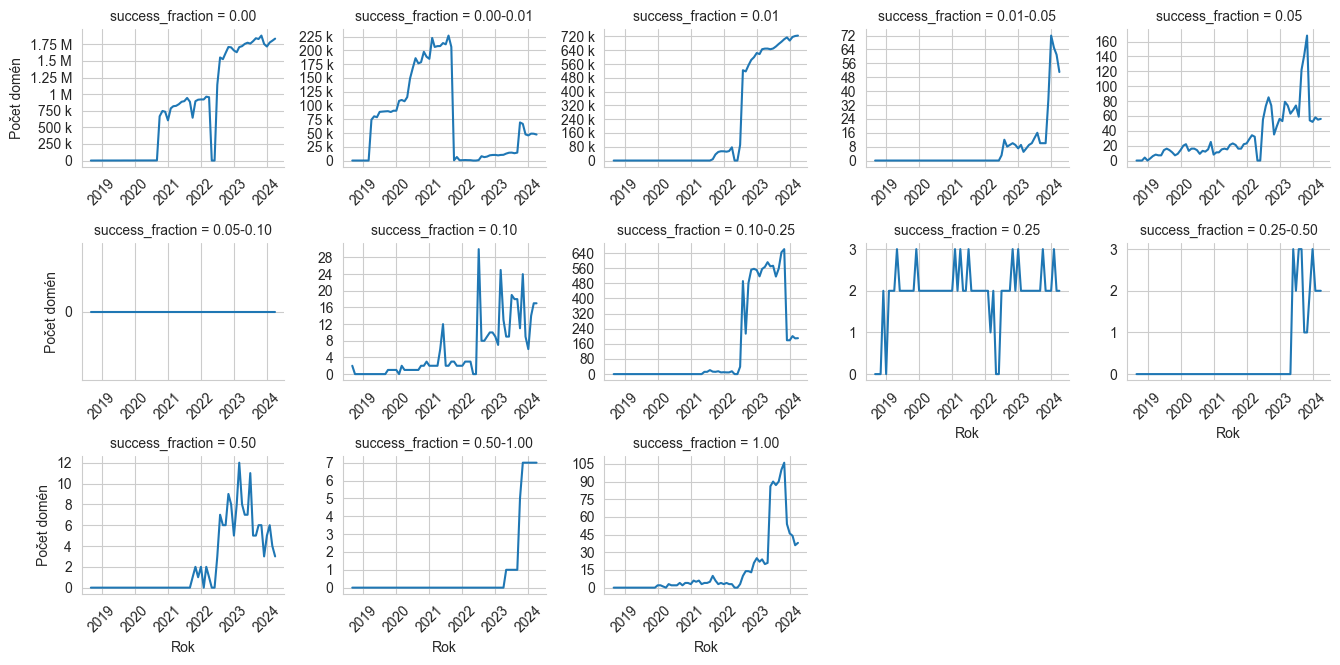

In [10]:
to_plot = sf_result.stack()
to_plot = to_plot.reset_index()
to_plot.rename(columns={'level_0': 'success_fraction', 'level_1': 'date', 0: 'domain_count'}, inplace=True)

to_plot['date_fmt'] = to_plot['date'].map(lambda date: pd.to_datetime(date))

sns.set_style('whitegrid')

g = sns.relplot(to_plot, kind='line', x='date_fmt', y='domain_count', 
                col='success_fraction', col_wrap=5, 
                height=2.25, aspect=1.2, 
                facet_kws={'sharey': False, 'sharex': False}
                )

for idx, ax in enumerate(g.axes):
    ax.xaxis.remove_overlapping_locs = False
    years = mdates.YearLocator()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.xaxis.set_minor_locator(ticker.NullLocator())
    
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))   
    ax.yaxis.set_major_formatter(ticker.EngFormatter())    
    
    if idx == 5:
        ax.set_yticks([0])
        ax.set_yticklabels([0])

    ax.tick_params(axis='x', which="major", rotation=45)


g.set_xlabels("Rok")
g.set_ylabels("Počet domén")

# g.figure.suptitle("Nastavenie hodnôt success_fraction počas skúmaného obdobia")
g.tight_layout()

g.savefig("graphs/httparchive_nel_config_sf_dist.pdf")